# Proyecto Minería de Datos: series temporales


## Introducción: Análisis de la Serie de Datos de Tráfico Aéreo

Este análisis se enfoca en un conjunto de datos extraídos de la plataforma Kaggle, que contiene información detallada sobre el tráfico aéreo mensual en los Estados Unidos desde el año 2003 hasta el 2023. El dataset incluye varias métricas clave, tales como el número de pasajeros, ingresos totales, y el número de vuelos, entre otros aspectos relevantes para el sector aéreo (https://www.kaggle.com/datasets/yyxian/u-s-airline-traffic-data?resource=download).

Para el propósito de este análisis y proyección futura, centraremos nuestra atención en la columna Int_Pax, la cual representa el número de Pasajeros de Viajes Aéreos Internacionales. Esta variable será fundamental para entender las tendencias y realizar predicciones sobre el flujo de pasajeros internacionales. A continuación, se presenta un resumen de las variables disponibles en el dataset:

Year: Año
Month: Mes
Dom_Pax: Pasajeros de Viajes Aéreos Domésticos
Int_Pax: Pasajeros de Viajes Aéreos Internacionales
Pax: Total de Pasajeros de Viajes Aéreos
Dom_Flt: Número de Vuelos Domésticos
Int_Flt: Número de Vuelos Internacionales
Flt: Total de Vuelos
Dom_RPM: Millas de Pasajero-Ingresos (Domésticas)
Int_RPM: Millas de Pasajero-Ingresos (Internacionales)
Esta reestructuración clarifica el enfoque y estructura de nuestra investigación, destacando la importancia de la columna Int_Pax para nuestras actividades de análisis y proyección.

## Representación gráfica y descomposición estacional

Comenzamos importando las librerías necesarias para todo el proyecto:

In [65]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pmdarima as pm

Cargamos el fichero csv con los datos:

In [66]:
# Ruta del directorio de trabajo deseado
directorio_trabajo = 'C:\\Users\\pablo\\OneDrive\\Documentos\\GitHub\\MasterBigDataML-DataMiningIV'
# Cambiar al directorio de trabajo deseado
os.chdir(directorio_trabajo)
df = pd.read_csv('src\\data\\air_traffic.csv')

Visualizamos las primeras 10 filas del dataframe:

In [67]:
df.head(10)

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
5,2003,6,"52,209,516","5,411,504","57,621,020","798,351","58,225","856,576","44,492,972","13,918,185","58,411,157","56,555,517","17,191,579","73,747,096",78.67,80.96,79.20
6,2003,7,"55,810,773","6,191,120","62,001,893","831,619","62,957","894,576","48,321,924","15,516,794","63,838,718","59,617,048","18,701,759","78,318,807",81.05,82.97,81.51
7,2003,8,"53,920,973","6,272,332","60,193,305","830,737","63,760","894,497","46,982,527","15,906,430","62,888,957","59,634,190","19,144,885","78,779,075",78.78,83.08,79.83
8,2003,9,"44,213,408","4,824,596","49,038,004","781,804","54,017","835,821","36,819,820","13,570,889","50,390,709","54,973,852","17,820,478","72,794,329",66.98,76.15,69.22
9,2003,10,"49,944,931","4,920,822","54,865,753","818,308","54,272","872,580","41,480,412","13,447,446","54,927,858","58,001,020","17,694,417","75,695,437",71.52,76.00,72.56


De un primer vistazo vemos que tendremos que unificar las columnas *Year* y *Month* en una misma columna de tipo date. No obstante comprobamos el tipo del resto de variables:


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


Como vemos todas son de tipo categórico, por lo que tendremos que transformar nuestra variable de estudio *Int_Pax* a tipo entero antes de realizar el forecasting.

Comprobamos también posibles filas duplicadas:

In [69]:
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print("Hay filas duplicadas.")
    print(duplicated_rows)
else:
    print("No hay filas duplicadas.")

No hay filas duplicadas.


Debemos cambiar el tipo de dato de la columna Date a tipo ``date``. Para nuestro estudio solo tomamos los valores de apertura, cierre, máximo y mínimo diario:

In [70]:
# Convertir la columna 'Tanggal' a datetime con el formato correcto
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df[['date','Int_Pax']]
df['Int_Pax'] = df['Int_Pax'].str.replace(',', '').astype(int)
# Establecer 'Tanggal' como índice del DataFrame
df.set_index('date', inplace=True)

Visualizamos el dataframe transformado con el que realizaremos la práctica:

In [71]:
df.head(10)

,Int_Pax
date,
2003-01-01,4905830
2003-02-01,4245366
2003-03-01,5008613
2003-04-01,4345444
2003-05-01,4610834
2003-06-01,5411504
2003-07-01,6191120
2003-08-01,6272332
2003-09-01,4824596


Representamos a continuación la serie temporal:

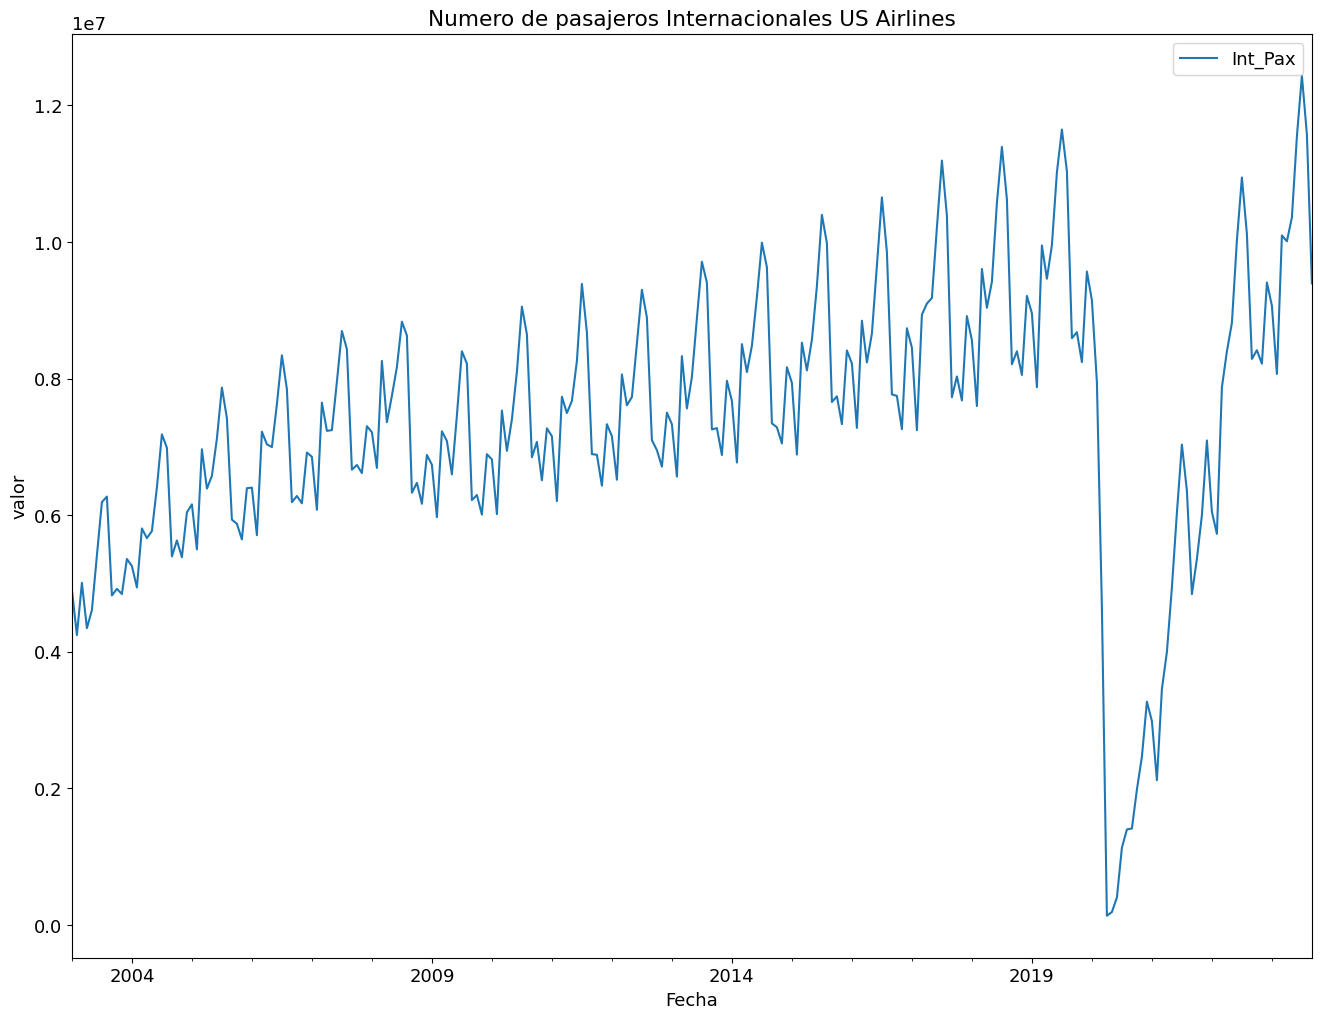

In [72]:
df.plot()
# Add legend and labels
plt.title('Numero de pasajeros Internacionales US Airlines')
plt.xlabel('Fecha')
plt.ylabel('valor')
# Show the plot
plt.show()

A simple vista se puede apreciar una tendencia creciente y un comportamiento estacional anual. Además destaca la influencia del Covid-19 en la gráfica que redujo a casi 0 los pasajeros en el año 2020.

In [73]:
S_int_pax = df['Int_Pax']

### Descomposición estacional

Vamos a ver primero, de cara a elegir un modelo aditivo o multiplicativo, si presenta valores nulos la serie temporal.

In [74]:
df.describe()

,Int_Pax
count,2.490000e+02
mean,7.392209e+06
std,2.020273e+06
min,1.366090e+05
25%,6.395022e+06
50%,7.419187e+06
75%,8.567847e+06
max,1.243262e+07


Como vemos, no hay valores nulos en las variables de estudio, se puede usar modelo multiplicativo. Usamos un periodo anual (12) y la función seasonal_decompose de la lubrería ``statsmodels``:

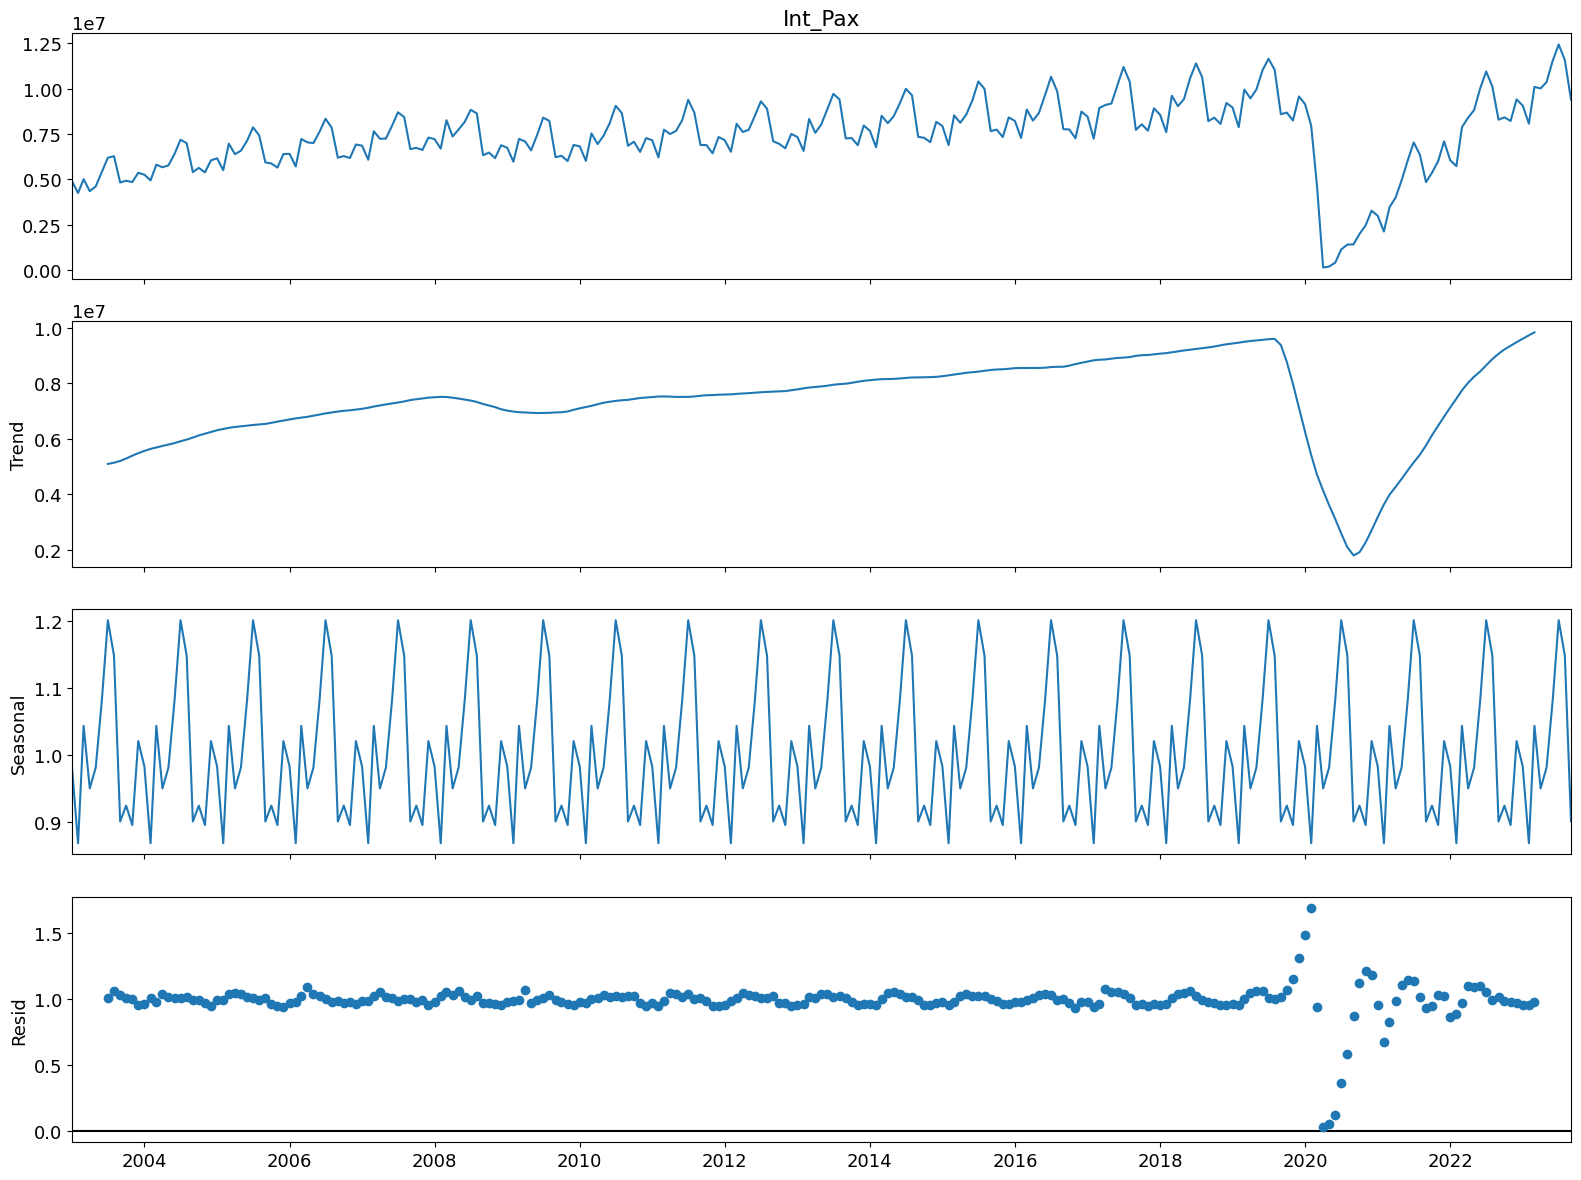

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

int_pax_series = df['Int_Pax'].squeeze()  # Asegúrate de que 'df' ya tiene el índice de fecha

# Descomposición multiplicativa para la serie de pasajeros internacionales
multiplicative_decomposition = seasonal_decompose(int_pax_series, model='multiplicative', period=12)

# Configurando el tamaño para los gráficos
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

# Graficando los componentes descompuestos de la serie temporal
fig = multiplicative_decomposition.plot()
plt.show()

Se han obtenido así las siguientes conclusiones sobre la descomposición estacional de los datos de pasajeros internacionales en EEUU:

* **Int_Pax (Gráfico superior)**: Este gráfico muestra la serie temporal original de los pasajeros internacionales. Se observa una tendencia general ascendente a lo largo del tiempo con fluctuaciones periódicas, que indican una posible estacionalidad. También hay una caída notable alrededor de 2020, lo que podría indicar el impacto de la pandemia de COVID-19 en los viajes aéreos.

* **Trend (Segundo gráfico)**: Este gráfico muestra la tendencia a largo plazo extraída de la serie temporal. Se observa que la tendencia estaba aumentando gradualmente hasta aproximadamente 2020, donde se presenta una caída significativa, posiblemente debido a restricciones de viaje y otros impactos relacionados con la pandemia. Después de esto, la tendencia comienza a recuperarse, aunque no ha vuelto completamente a los niveles previos a la pandemia.

* **Seasonal (Tercer gráfico)**: Este gráfico representa la estacionalidad dentro de la serie temporal, la cual parece tener un patrón repetitivo y predecible a lo largo del año. Esto podría reflejar el comportamiento estacional típico en los viajes aéreos, como los picos durante los meses de vacaciones y las caídas durante los períodos fuera de temporada.

* **Resid (Cuarto gráfico)**: El último gráfico muestra los residuos, que son las componentes de la serie temporal que no se explican por la tendencia ni por la estacionalidad. Los puntos en este gráfico parecen ser bastante estables y cercanos a la línea de 1.0 hasta el 2020. Después, hay una dispersión más notable de los puntos, lo que indica un incremento en la variabilidad o posibles outliers, que podrían estar asociados con la inestabilidad del sector aéreo durante la pandemia.

En resumen, estos gráficos indican que los pasajeros de vuelos internacionales en los EE. UU. mostraron una tendencia creciente y estacionalidad predecible hasta 2020, cuando la pandemia de COVID-19 tuvo un impacto significativo en la industria, causando una interrupción evidente en la tendencia y un aumento en la variabilidad de los residuos.

In [76]:
print(multiplicative_decomposition.seasonal[:12])

date
2003-01-01    0.982941
2003-02-01    0.868045
2003-03-01    1.043688
2003-04-01    0.950098
2003-05-01    0.981278
2003-06-01    1.082534
2003-07-01    1.201755
2003-08-01    1.148568
2003-09-01    0.900615
2003-10-01    0.924333
2003-11-01    0.895273
2003-12-01    1.020870
Name: seasonal, dtype: float64


Calculamos la serie ajustada estacionalmente:

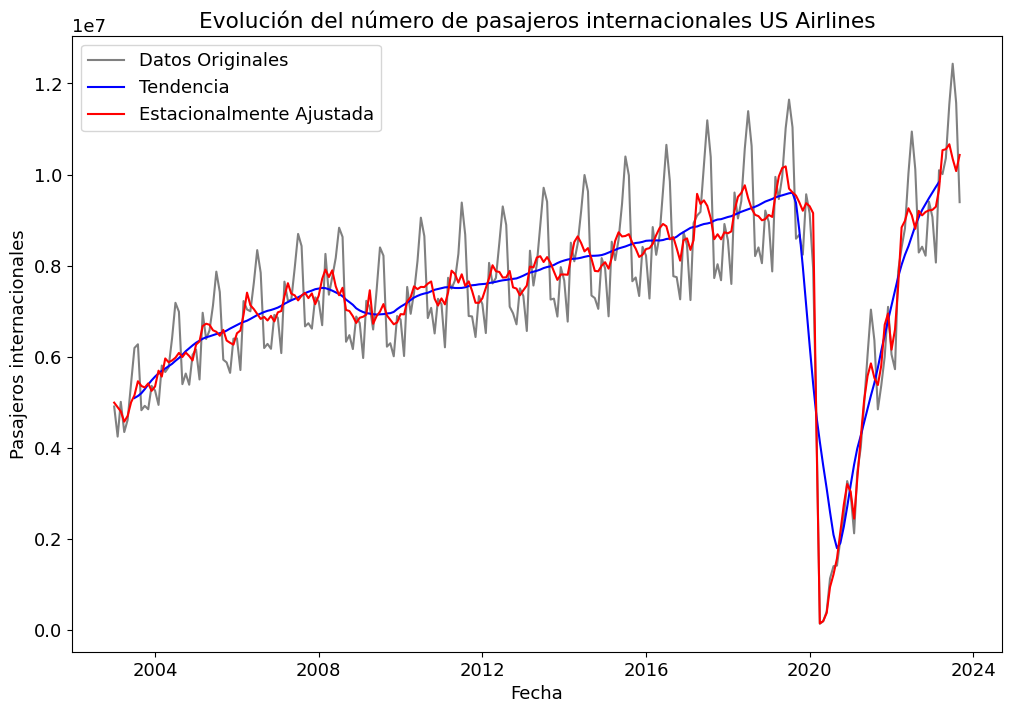

In [77]:
# Correct the seasonal adjustment for a multiplicative model
int_pax_series_adjusted = int_pax_series / multiplicative_decomposition.seasonal

# Plotting
plt.figure(figsize=(12, 8))

# Serie original
plt.plot(int_pax_series, label='Datos Originales', color='gray')

# Tendencia
plt.plot(multiplicative_decomposition.trend, label='Tendencia', color='blue')

# Estacionalmente ajustada
plt.plot(int_pax_series_adjusted, label='Estacionalmente Ajustada', color='red')

plt.xlabel('Fecha')
plt.ylabel('Pasajeros internacionales')
plt.title('Evolución del número de pasajeros internacionales US Airlines')
plt.legend()
plt.show()

## Partición en entrenamiento y test

Tomamos los datos desde 2003 hasta el último mes de 2022 como entrenamiento y dejamos los de 2022 a 2023 como test (ya que los de 2023 no están completos).

In [78]:
# Dividir los datos en conjuntos de entrenamiento y prueba usando el índice
# Datos de entrenamiento: de 2020 a 2022
train_df = df.loc['2003-01-01':'2021-12-01',['Int_Pax']]

# Datos de prueba: medio año 2023
test_df = df.loc['2022-01-01':,['Int_Pax']]

# Mostrar la forma (número de filas y columnas) del DataFrame de entrenamiento
test_df.shape

(21, 1)

In [79]:
# Slicing the DataFrame to include only data from 2020-01-01 to 2022-12-31
S_int_pax_train = train_df['Int_Pax']
S_int_pax_test = test_df['Int_Pax']

### Métodos de suavizado exponencial
Encontrar el modelo de suavizado exponencial más adecuado, mostrando una tabla
con los estimadores de los parámetros del modelo elegido. Para dicho modelo,
representar gráficamente la serie observada y la suavizada con las predicciones para el periodo TEST. Mostrar una tabla con las predicciones

### Modelo 1: Alisado simple

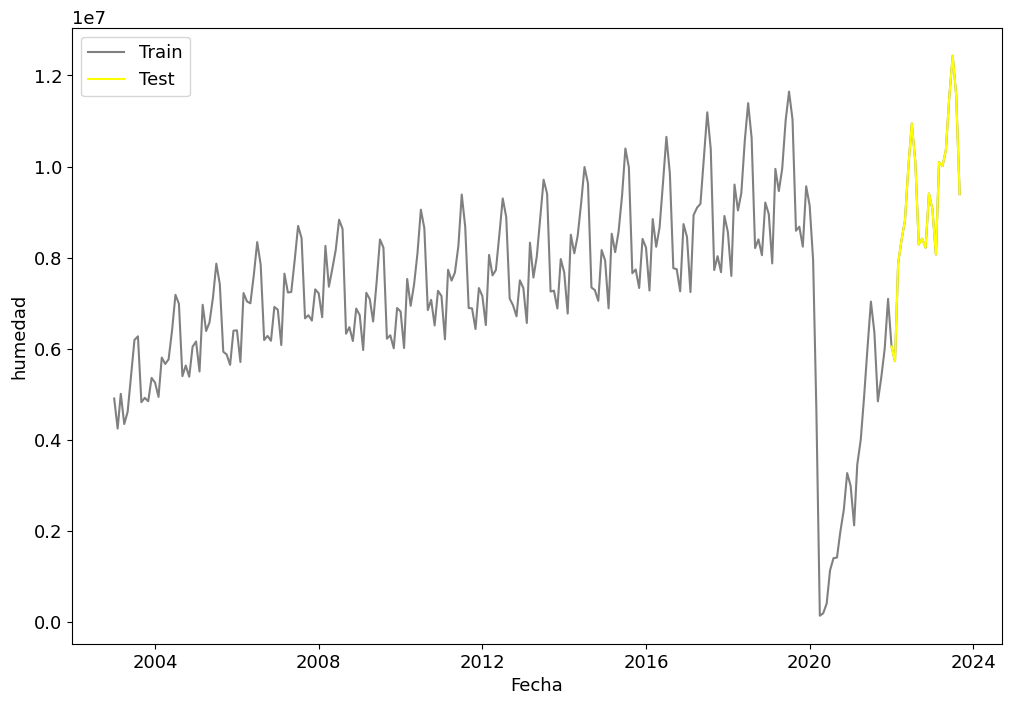

In [80]:
# Add legend and labels
plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax, label='Train', color='gray')
plt.plot(S_int_pax_test, label='Test', color='yellow')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('humedad')
# Show the plot
plt.show()

In [81]:
S_int_pax_train

date
2003-01-01    4905830
2003-02-01    4245366
2003-03-01    5008613
2003-04-01    4345444
2003-05-01    4610834
               ...   
2021-08-01    6357070
2021-09-01    4843245
2021-10-01    5360481
2021-11-01    5998703
2021-12-01    7093846
Name: Int_Pax, Length: 228, dtype: int32

In [82]:
S_int_pax_test

date
2022-01-01     6048973
2022-02-01     5725939
2022-03-01     7872874
2022-04-01     8398121
2022-05-01     8815732
2022-06-01    10023468
2022-07-01    10943155
2022-08-01    10115929
2022-09-01     8287331
2022-10-01     8414518
2022-11-01     8216914
2022-12-01     9405384
2023-01-01     9066833
2023-02-01     8066893
2023-03-01    10094584
2023-04-01    10008645
2023-05-01    10358666
2023-06-01    11544505
2023-07-01    12432615
2023-08-01    11572149
2023-09-01     9392985
Name: Int_Pax, dtype: int32

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


21
Length of forecast: 21
date
2022-01-01    7.088354e+06
2022-02-01    7.088354e+06
2022-03-01    7.088354e+06
2022-04-01    7.088354e+06
2022-05-01    7.088354e+06
2022-06-01    7.088354e+06
2022-07-01    7.088354e+06
2022-08-01    7.088354e+06
2022-09-01    7.088354e+06
2022-10-01    7.088354e+06
2022-11-01    7.088354e+06
2022-12-01    7.088354e+06
2023-01-01    7.088354e+06
2023-02-01    7.088354e+06
2023-03-01    7.088354e+06
2023-04-01    7.088354e+06
2023-05-01    7.088354e+06
2023-06-01    7.088354e+06
2023-07-01    7.088354e+06
2023-08-01    7.088354e+06
2023-09-01    7.088354e+06
dtype: float64


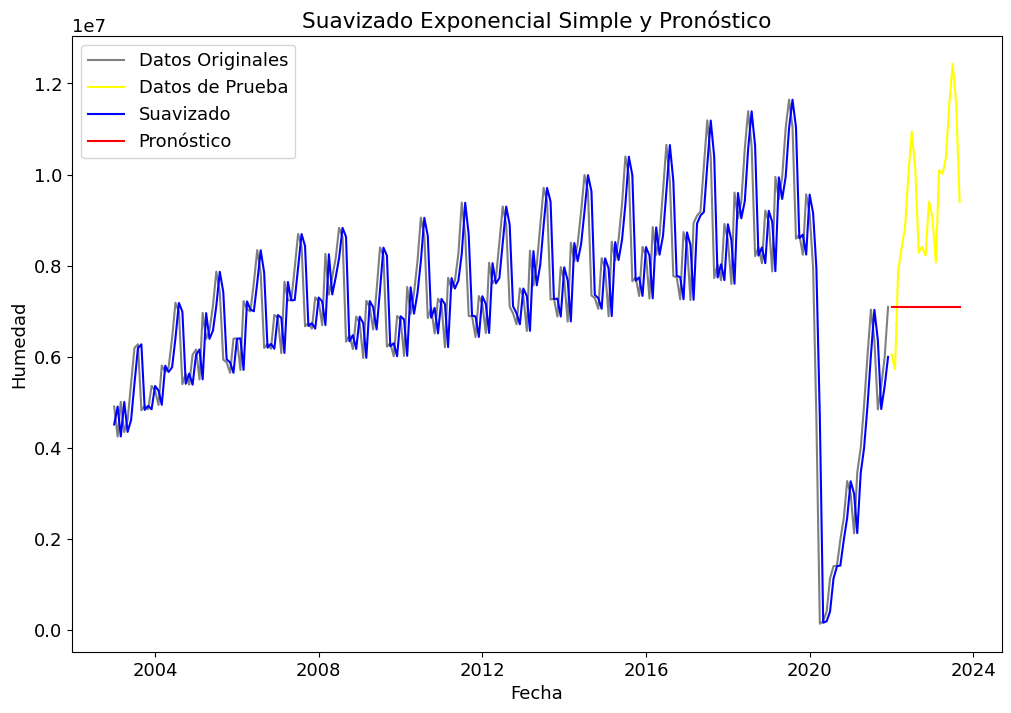

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(S_int_pax_train, initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en test
fcast_length = len(S_int_pax_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast = model.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
fcast_series = pd.Series(fcast.values, index=S_int_pax_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Datos Originales', color='gray')
plt.plot(S_int_pax_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

### Modelo 2: Modelo alisado doble de Holt

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


21
Length of forecast: 21
date
2022-01-01    7.188902e+06
2022-02-01    7.288948e+06
2022-03-01    7.388994e+06
2022-04-01    7.489040e+06
2022-05-01    7.589086e+06
2022-06-01    7.689132e+06
2022-07-01    7.789178e+06
2022-08-01    7.889224e+06
2022-09-01    7.989270e+06
2022-10-01    8.089316e+06
2022-11-01    8.189362e+06
2022-12-01    8.289408e+06
2023-01-01    8.389454e+06
2023-02-01    8.489500e+06
2023-03-01    8.589546e+06
2023-04-01    8.689592e+06
2023-05-01    8.789638e+06
2023-06-01    8.889684e+06
2023-07-01    8.989730e+06
2023-08-01    9.089776e+06
2023-09-01    9.189822e+06
dtype: float64


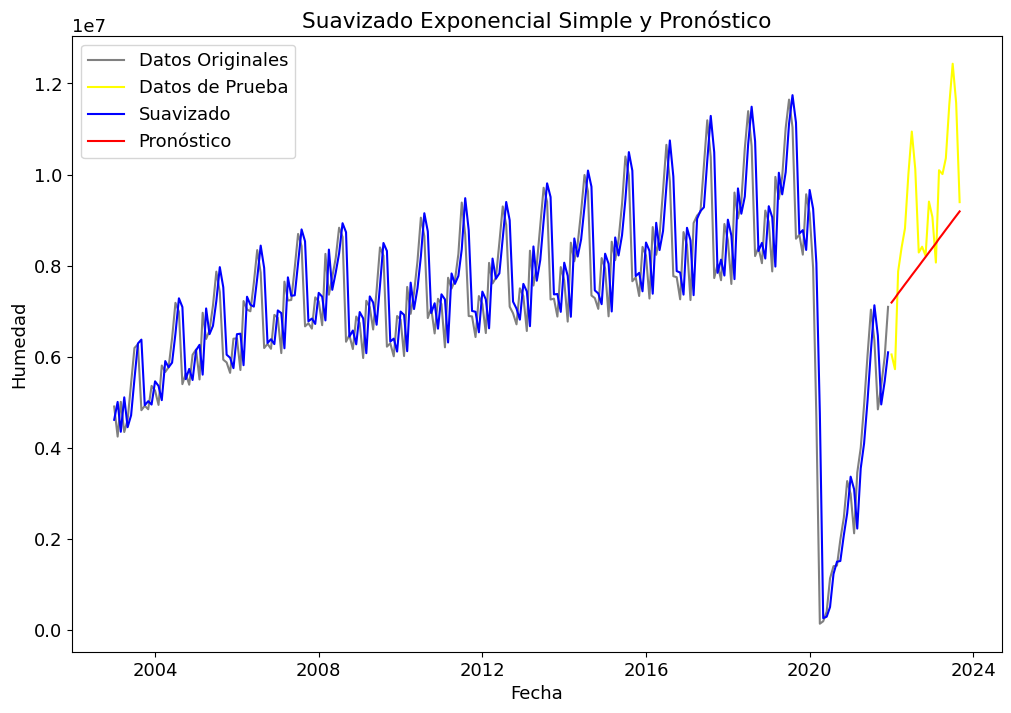

In [84]:
model1 = Holt(S_int_pax_train, initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_int_pax_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast1 = model1.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series1 = pd.Series(fcast1.values, index=S_int_pax_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series1)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_int_pax_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model1.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series1, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

### Modelo 3: Método de tendencia amortiguada

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


21
Length of forecast: 21
date
2022-01-01    7.098409e+06
2022-02-01    7.108314e+06
2022-03-01    7.118120e+06
2022-04-01    7.127828e+06
2022-05-01    7.137439e+06
2022-06-01    7.146953e+06
2022-07-01    7.156373e+06
2022-08-01    7.165698e+06
2022-09-01    7.174930e+06
2022-10-01    7.184070e+06
2022-11-01    7.193118e+06
2022-12-01    7.202076e+06
2023-01-01    7.210944e+06
2023-02-01    7.219724e+06
2023-03-01    7.228415e+06
2023-04-01    7.237020e+06
2023-05-01    7.245539e+06
2023-06-01    7.253973e+06
2023-07-01    7.262322e+06
2023-08-01    7.270588e+06
2023-09-01    7.278771e+06
dtype: float64


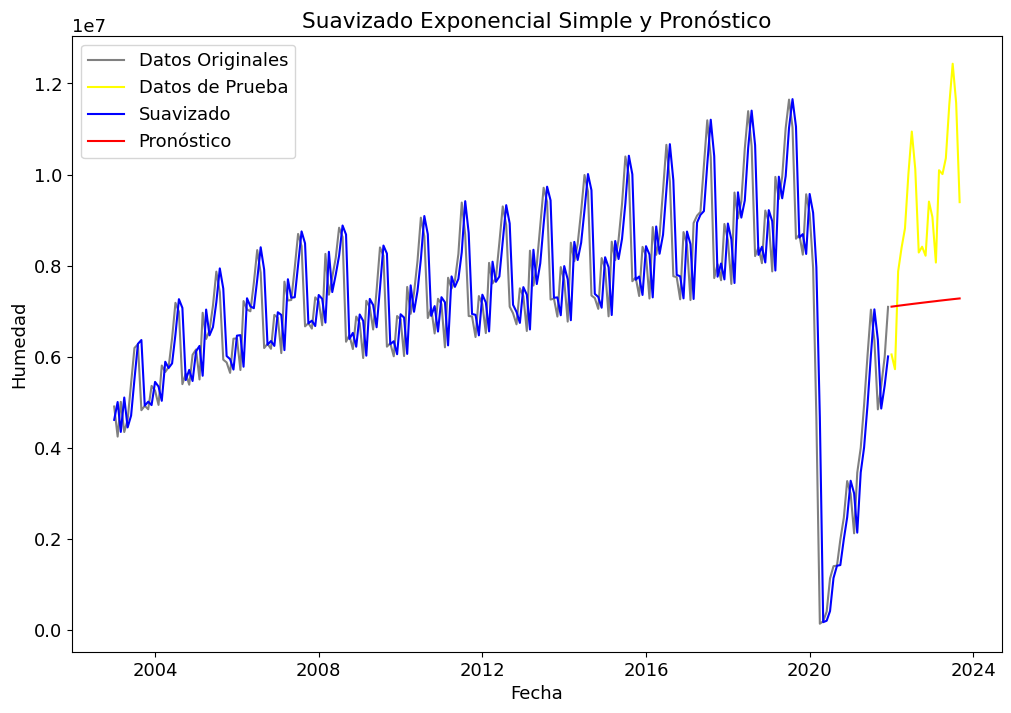

In [85]:
model2 = Holt(S_int_pax_train,damped_trend=True, initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_int_pax_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast2 = model2.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series2 = pd.Series(fcast2.values, index=S_int_pax_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series2)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_int_pax_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model2.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series2, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

### Modelo 4: Holt-Winters

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


21
Length of forecast: 21
date
2022-01-01    6.893295e+06
2022-02-01    6.218314e+06
2022-03-01    7.650182e+06
2022-04-01    7.287875e+06
2022-05-01    7.650670e+06
2022-06-01    8.336298e+06
2022-07-01    9.059880e+06
2022-08-01    8.657916e+06
2022-09-01    7.009098e+06
2022-10-01    7.279847e+06
2022-11-01    7.138840e+06
2022-12-01    7.994669e+06
2023-01-01    7.803777e+06
2023-02-01    7.128796e+06
2023-03-01    8.560664e+06
2023-04-01    8.198357e+06
2023-05-01    8.561151e+06
2023-06-01    9.246780e+06
2023-07-01    9.970361e+06
2023-08-01    9.568398e+06
2023-09-01    7.919579e+06
dtype: float64


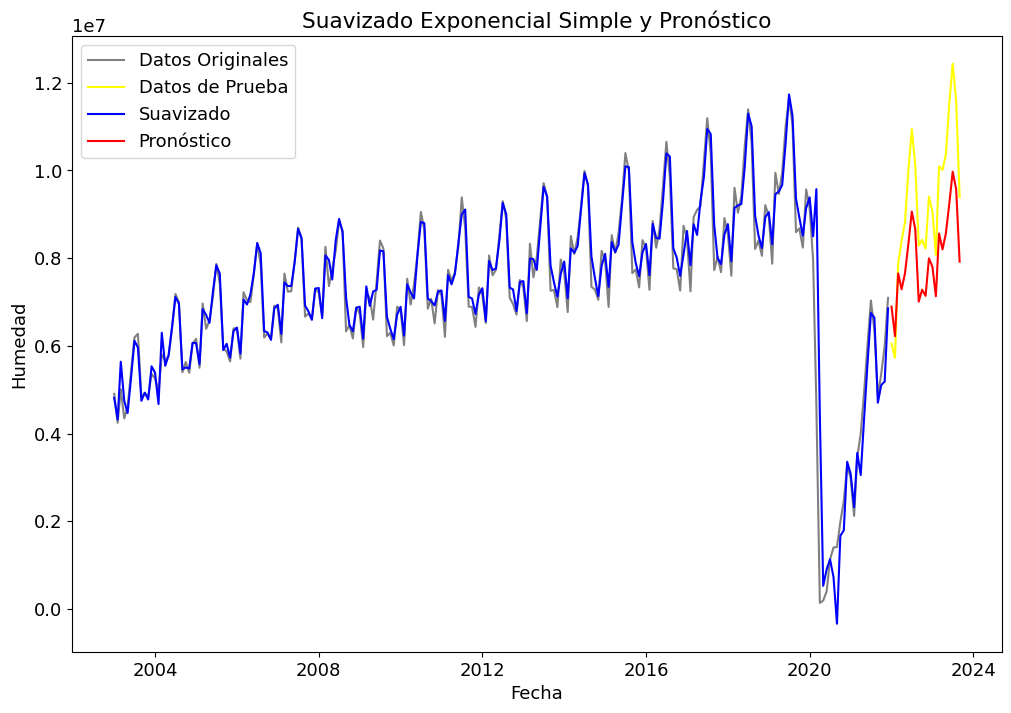

In [86]:
model3 = ExponentialSmoothing(S_int_pax_train, seasonal_periods=12,trend="add",
seasonal="add", initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_int_pax_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast2 = model3.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series3 = pd.Series(fcast2.values, index=S_int_pax_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series3)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_int_pax_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model3.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series3, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

In [87]:
S_int_pax_test

date
2022-01-01     6048973
2022-02-01     5725939
2022-03-01     7872874
2022-04-01     8398121
2022-05-01     8815732
2022-06-01    10023468
2022-07-01    10943155
2022-08-01    10115929
2022-09-01     8287331
2022-10-01     8414518
2022-11-01     8216914
2022-12-01     9405384
2023-01-01     9066833
2023-02-01     8066893
2023-03-01    10094584
2023-04-01    10008645
2023-05-01    10358666
2023-06-01    11544505
2023-07-01    12432615
2023-08-01    11572149
2023-09-01     9392985
Name: Int_Pax, dtype: int32

A continuación se muestra una tabla resumen con las predicciones de los modelos probados:

| Fecha      | Suavizado Exponencial Simple | Alisado Doble de Holt | Tendencia Amortiguada | Holt-Winters | Valores Reales |
|------------|-----------------------------|-----------------------|-----------------------|--------------|----------------|
| 2022-01-01 | 7,088,354                   | 7,188,902             | 7,098,409             | 6,893,295    | 6,048,973      |
| 2022-02-01 | 7,088,354                   | 7,288,948             | 7,108,314             | 6,218,314    | 5,725,939      |
| 2022-03-01 | 7,088,354                   | 7,388,994             | 7,118,120             | 7,650,182    | 7,872,874      |
| 2022-04-01 | 7,088,354                   | 7,489,040             | 7,127,828             | 7,287,875    | 8,398,121      |
| 2022-05-01 | 7,088,354                   | 7,589,086             | 7,137,439             | 7,650,670    | 8,815,732      |
| 2022-06-01 | 7,088,354                   | 7,689,132             | 7,146,953             | 8,336,298    | 10,023,468     |
| 2022-07-01 | 7,088,354                   | 7,789,178             | 7,156,373             | 9,059,880    | 10,943,155     |
| 2022-08-01 | 7,088,354                   | 7,889,224             | 7,165,698             | 8,657,916    | 10,115,929     |
| 2022-09-01 | 7,088,354                   | 7,989,270             | 7,174,930             | 7,009,098    | 8,287,331      |
| 2022-10-01 | 7,088,354                   | 8,089,316             | 7,184,070             | 7,279,847    | 8,414,518      |
| 2022-11-01 | 7,088,354                   | 8,189,362             | 7,193,118             | 7,138,840    | 8,216,914      |
| 2022-12-01 | 7,088,354                   | 8,289,408             | 7,202,076             | 7,994,669    | 9,405,384      |
| 2023-01-01 | 7,088,354                   | 8,389,454             | 7,210,944             | 7,803,777    | 9,066,833      |
| 2023-02-01 | 7,088,354                   | 8,489,500             | 7,219,724             | 7,128,796    | 8,066,893      |
| 2023-03-01 | 7,088,354                   | 8,589,546             | 7,228,415             | 8,560,664    | 10,094,584     |
| 2023-04-01 | 7,088,354                   | 8,689,592             | 7,237,020             | 8,198,357    | 10,008,645     |
| 2023-05-01 | 7,088,354                   | 8,789,638             | 7,245,539             | 8,561,151    | 10,358,666     |
| 2023-06-01 | 7,088,354                   | 8,889,684             | 7,253,973             | 9,246,780    | 11,544,505     |
| 2023-07-01 | 7,088,354                   | 8,989,730             | 7,262,322             | 9,970,361    | 12,432,615     |
| 2023-08-01 | 7,088,354                   | 9,089,776             | 7,270,588             | 9,568,398    | 11,572,149     |
| 2023-09-01 | 7,088,354                   | 9,189,822             | 7,278,771             | 7,919,579    | 9,392,985      |


En base a los resultados obtenidos tanto gráficamente como en la tabla anterior, podemos ver cómo el modelo que mejor se ajusta a los datos reales es el de Holt-Winters. Es por ello que tomamos este modelo como ganador por el momento.


Vemos ahora el valor de sus parámetros:

In [88]:
from tabulate import tabulate

# Encabezados de la tabla
headers = ['Name', 'Param', 'Value', 'Optimized']
# Imprimir la tabla con formato
table_str = tabulate(model2.params_formatted, headers, tablefmt='fancy_grid')
# Mostrar la tabla formateada
print(table_str)

╒═════════════════╤═════════╤══════════════════╤═════════════╕
│ Name            │ Param   │            Value │ Optimized   │
╞═════════════════╪═════════╪══════════════════╪═════════════╡
│ smoothing_level │ alpha   │      0.995       │ True        │
├─────────────────┼─────────┼──────────────────┼─────────────┤
│ smoothing_trend │ beta    │      0.0001      │ True        │
├─────────────────┼─────────┼──────────────────┼─────────────┤
│ initial_level   │ l.0     │      4.51212e+06 │ True        │
├─────────────────┼─────────┼──────────────────┼─────────────┤
│ initial_trend   │ b.0     │ 101075           │ True        │
├─────────────────┼─────────┼──────────────────┼─────────────┤
│ damping_trend   │ phi     │      0.99        │ True        │
╘═════════════════╧═════════╧══════════════════╧═════════════╛


In [89]:
print(fcast_series)

date
2022-01-01    7.088354e+06
2022-02-01    7.088354e+06
2022-03-01    7.088354e+06
2022-04-01    7.088354e+06
2022-05-01    7.088354e+06
2022-06-01    7.088354e+06
2022-07-01    7.088354e+06
2022-08-01    7.088354e+06
2022-09-01    7.088354e+06
2022-10-01    7.088354e+06
2022-11-01    7.088354e+06
2022-12-01    7.088354e+06
2023-01-01    7.088354e+06
2023-02-01    7.088354e+06
2023-03-01    7.088354e+06
2023-04-01    7.088354e+06
2023-05-01    7.088354e+06
2023-06-01    7.088354e+06
2023-07-01    7.088354e+06
2023-08-01    7.088354e+06
2023-09-01    7.088354e+06
dtype: float64


## Correlogramas y modelo

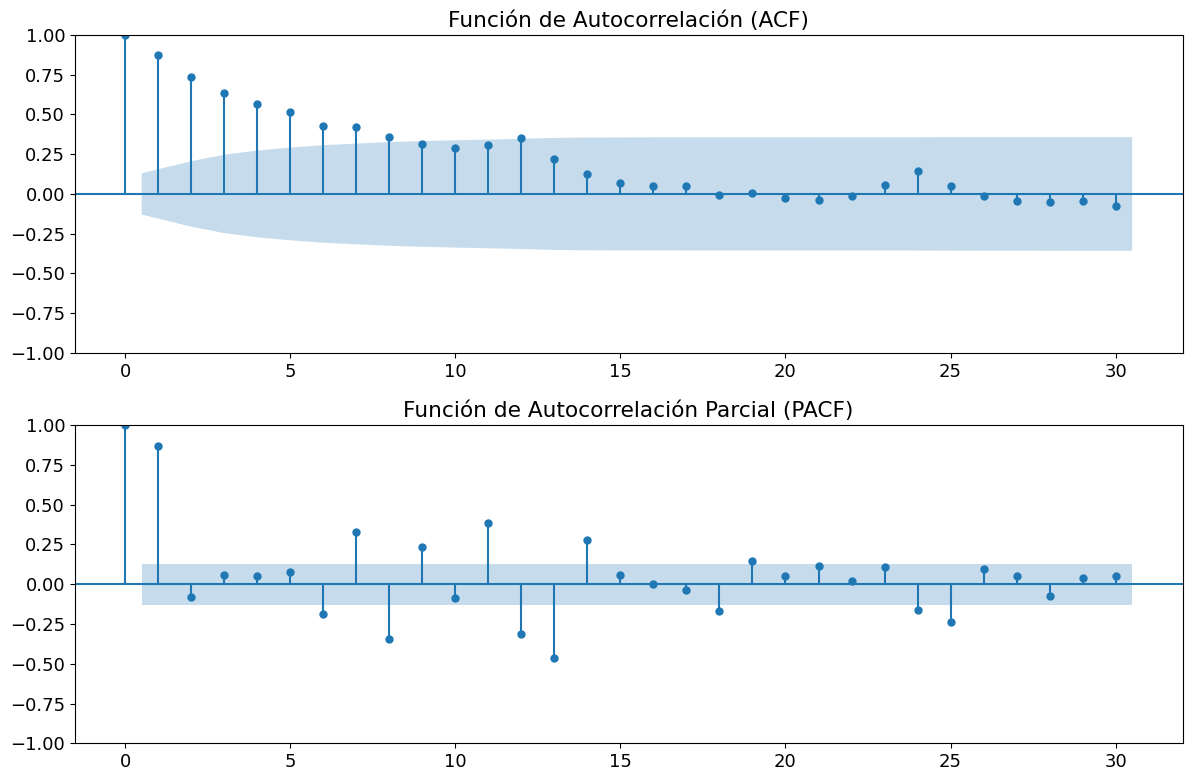

In [90]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(S_int_pax_train, lags=30, ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF)')
plot_pacf(S_int_pax_train, lags=30, ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

El análisis de los gráficos obtenidos es el siguiente:

* **Función de Autocorrelación (ACF)**: La ACF mide la correlación entre la serie temporal y una versión retrasada de sí misma en diferentes puntos de retraso. En el gráfico ACF, observamos un decaimiento lento y un patrón de picos en los retrasos múltiplos de 12, lo que sugiere una estacionalidad fuerte y posiblemente alguna tendencia en la serie temporal como ya vimos en análisis anteriores. Esto es evidente porque la correlación se mantiene significativa y por encima del área de sombreado azul (que representa el intervalo de confianza) en múltiples retrasos.

* **Función de Autocorrelación Parcial (PACF)**: La PACF mide la correlación entre la serie temporal y sus lagged (retrasadas) observaciones, pero después de eliminar las contribuciones de los retrasos intermedios. En el gráfico PACF, hay un pico significativo en el primer retraso y posiblemente en el segundo, lo cual sugiere que un modelo AR(p) con p = 1 o p = 2 podría ser adecuado para los datos, ya que solo los primeros uno o dos lags tienen una correlación parcial significativa con la serie temporal.

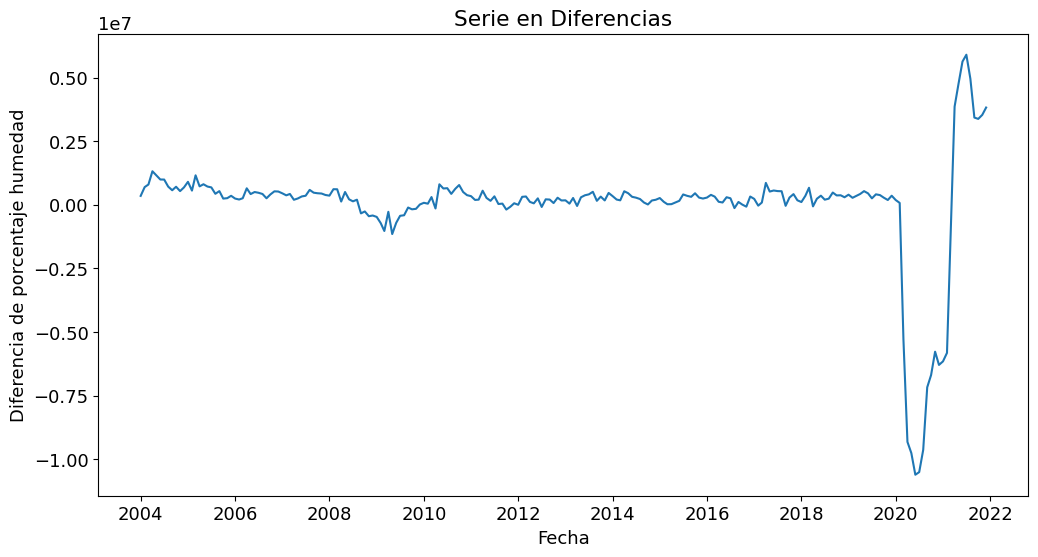

In [91]:
# Calcular las diferencias de orden estacional
diferencias = S_int_pax_train.diff(12)
plt.figure(figsize=(12, 6))
plt.plot(diferencias)
plt.title('Serie en Diferencias')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de porcentaje humedad')
plt.show()


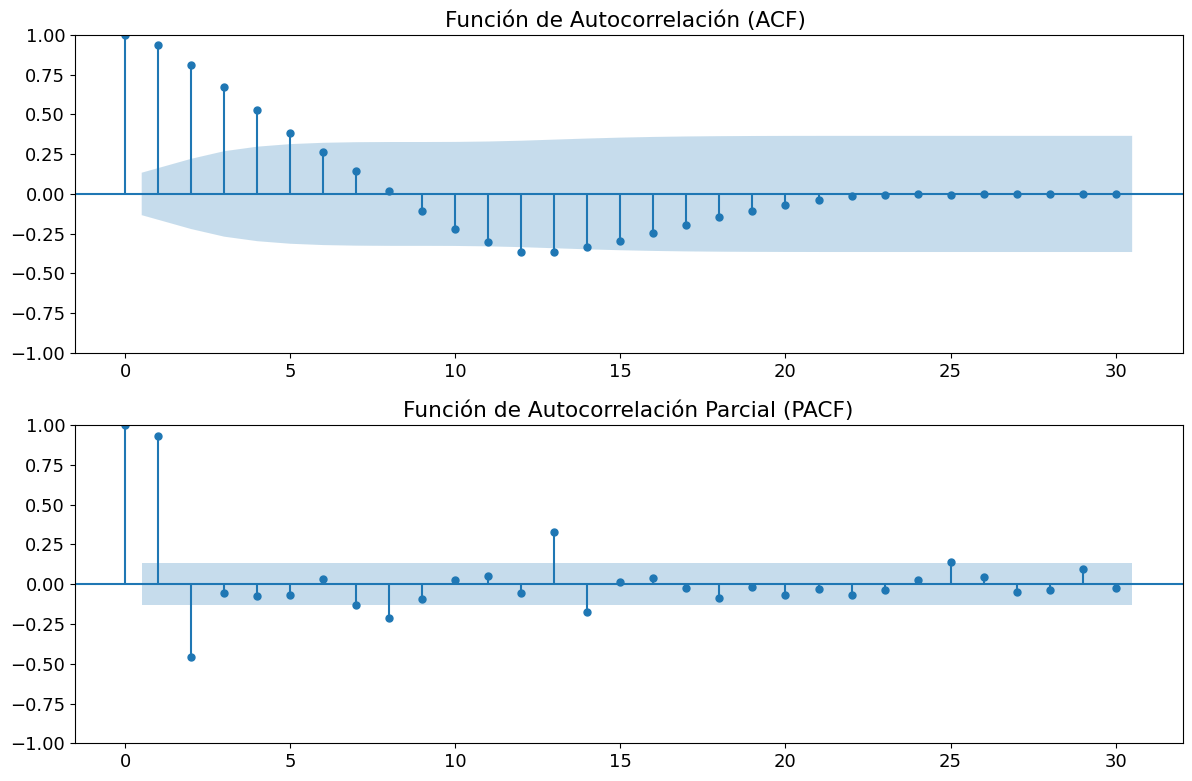

In [92]:
# Elimina los valores faltantes que aparecen en el inicio al hacer las diferencias
diferencias = diferencias.dropna()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diferencias, lags=30, ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF) ')
plot_pacf(diferencias, lags=30, ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()


* **Función de Autocorrelación (ACF)**: La ACF después de la diferenciación muestra que la correlación inicial es fuerte y negativa en el primer lag y luego cae bruscamente, aproximándose a cero o volviéndose insignificante para los siguientes lags. Esto es indicativo de que la diferenciación ha sido efectiva para eliminar la tendencia o la estacionalidad en los datos, haciendo que la serie temporal sea más estacionaria.

* **Función de Autocorrelación Parcial (PACF)**: La PACF después de la diferenciación muestra un pico significativo en el primer lag seguido de valores que caen rápidamente dentro del área de confianza (indicada por el área de sombreado azul), lo que sugiere que la serie diferenciada puede ser explicada por un modelo autorregresivo de orden 1 (AR(1)).

El hecho de que la ACF y la PACF muestren un pico significativo en el primer lag y luego caigan por debajo del área de confianza sugiere que un modelo ARIMA (1,1,0) o (0,1,1) podría ser adecuado para modelar la serie temporal diferenciada.

In [93]:
modelo_arima = sm.tsa.ARIMA(S_int_pax_train, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))
resultados = modelo_arima.fit()
# Obtener un resumen del modelo
print(resultados.summary())

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Int_Pax   No. Observations:                  228
Model:             ARIMA(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -3153.540
Date:                            Fri, 08 Mar 2024   AIC                           6313.079
Time:                                    18:07:38   BIC                           6323.191
Sample:                                01-01-2003   HQIC                          6317.165
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3401      0.032     10.797      0.000       0.278       0.402
ma.S.L12      -0.6574      0.048   

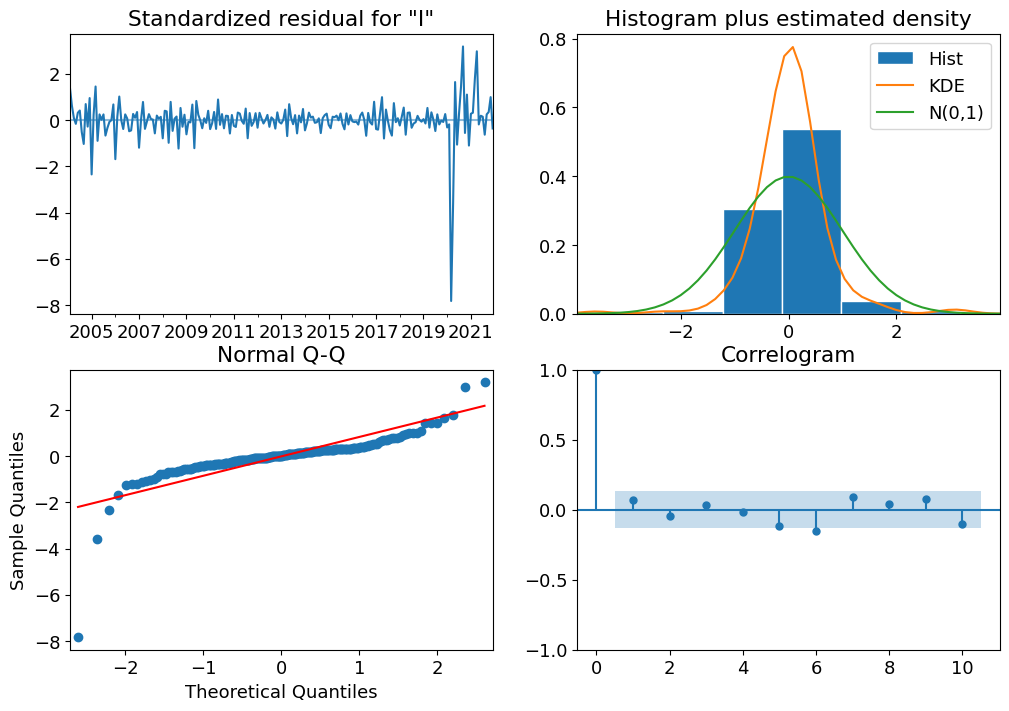

In [94]:
# Graficar los residuos del modelo
resultados.plot_diagnostics(figsize=(12, 8))
plt.show()

In [95]:
# Calcular las predicciones
prediciones_1 = resultados.get_forecast(steps=21)
predi_test=prediciones_1.predicted_mean
print(predi_test)

2022-01-01    6.792450e+06
2022-02-01    5.784340e+06
2022-03-01    6.306812e+06
2022-04-01    5.298159e+06
2022-05-01    5.794374e+06
2022-06-01    6.655940e+06
2022-07-01    7.512606e+06
2022-08-01    7.059724e+06
2022-09-01    5.516104e+06
2022-10-01    5.873362e+06
2022-11-01    6.030882e+06
2022-12-01    7.118794e+06
2023-01-01    6.814938e+06
2023-02-01    5.805993e+06
2023-03-01    6.328180e+06
2023-04-01    5.319430e+06
2023-05-01    5.815612e+06
2023-06-01    6.677167e+06
2023-07-01    7.533829e+06
2023-08-01    7.080947e+06
2023-09-01    5.537325e+06
Freq: MS, Name: predicted_mean, dtype: float64


Pintamos la predicción junto con los valores reales:

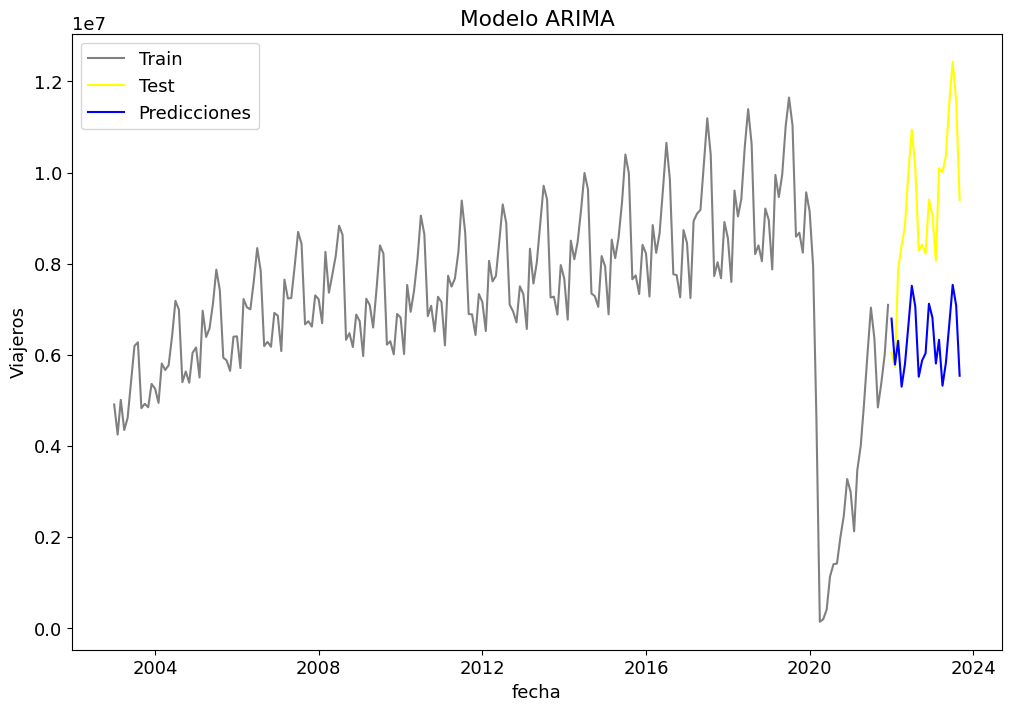

In [96]:
plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Train', color='gray')
plt.plot(S_int_pax_test, label='Test', color='yellow')
plt.plot(prediciones_1.predicted_mean, label='Predicciones', color='blue')
plt.xlabel('fecha')
plt.ylabel('Viajeros')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()


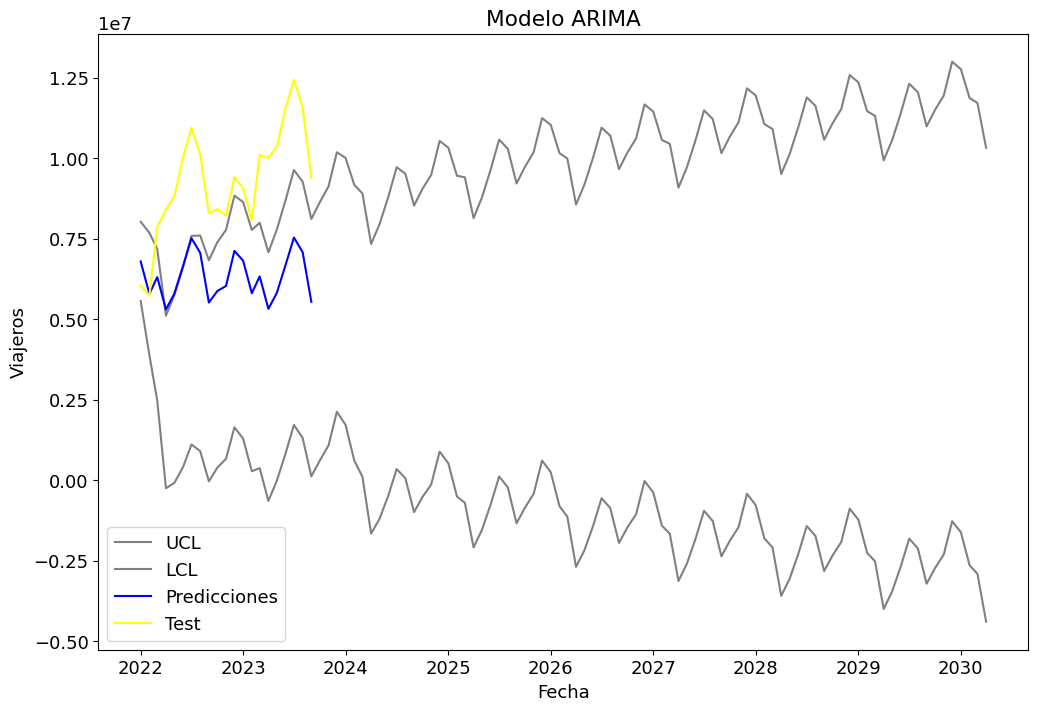

In [97]:
# Obtener intervalos de confianza para las predicciones
intervalos_confianza = prediciones.conf_int()
plt.figure(figsize=(12, 8))
plt.plot(intervalos_confianza['lower Int_Pax'], label='UCL', color='gray')
plt.plot(intervalos_confianza['upper Int_Pax'], label='LCL', color='gray')
plt.plot(predi_test, label='Predicciones', color='blue')
plt.plot(S_int_pax_test, label='Test', color='yellow')
plt.xlabel('Fecha')
plt.ylabel('Viajeros')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()


* **Líneas grises (UCL y LCL)**: Representan el límite superior (Upper Confidence Limit) y el límite inferior (Lower Confidence Limit) del intervalo de confianza para las predicciones del modelo ARIMA. Estos intervalos sugieren el rango dentro del cual se espera que los valores reales caigan con un cierto nivel de confianza (típicamente 95%).

* **Línea azul (Predicciones)**: Muestra las predicciones de pasajeros internacionales del modelo ARIMA para el periodo de prueba. Esta línea es la proyección del modelo basada en los datos históricos.

* **Línea amarilla (Test)**: Indica los datos reales de viajeros internacionales durante el período de prueba. Comparar esta línea con las predicciones y los intervalos de confianza nos ayuda a evaluar qué tan bien el modelo se ajusta a los datos reales.

En cuanto a la evaluación del modelo, parece que las predicciones siguen la tendencia general de los datos reales, pero no capturan algunas de las variaciones más finas. Además, los datos de prueba parecen estar, en su mayoría, dentro de los intervalos de confianza, lo que indica que el modelo tiene cierto grado de precisión. Sin embargo, hay periodos, como alrededor de julio de 2023, donde las predicciones se desvían de los datos reales, lo que podría sugerir que el modelo puede necesitar ajustes o que podrían haber ocurrido eventos no previstos que afectaron el número de viajeros internacionales.

## Modelo Arima Automático

In [98]:
modelo_auto= pm.auto_arima(S_int_pax_train, start_p=1, start_q=1, max_p=3, max_q=3,
m=12, start_P=0, seasonal=True, d=0, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True) # mostramos los modelos probados

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=6385.681, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6913.088, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6400.303, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6745.268, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6911.410, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=6466.955, Time=0.08 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=6381.079, Time=0.31 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=6381.926, Time=0.18 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=6382.690, Time=1.48 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=6382.362, Time=0.85 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=6382.863, Time=0.71 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=6382.010, Time=0.58 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=6746.372, Time=0.30 sec
 ARIMA(1,0,0)(1,1,1)[12]

In [99]:
print(modelo_auto.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  228
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -3182.448
Date:                              Fri, 08 Mar 2024   AIC                           6374.895
Time:                                      18:08:06   BIC                           6391.772
Sample:                                  01-01-2003   HQIC                          6381.713
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1740      0.023     50.851      0.000       1.129       1.219
ar.L2         -0.24

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


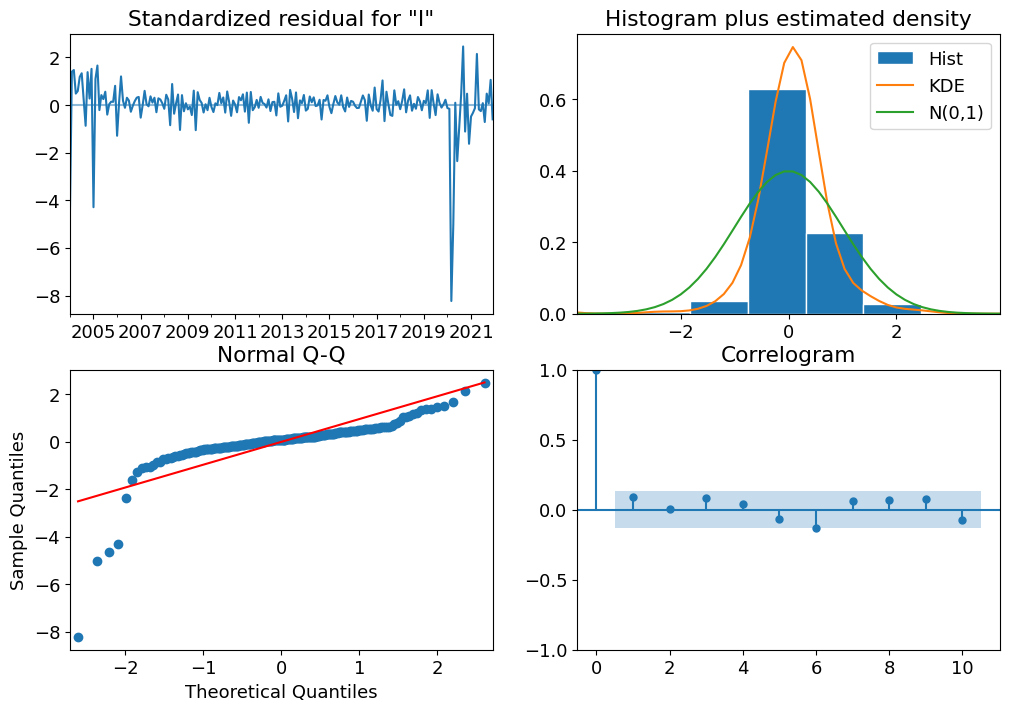

In [100]:
best_arima = sm.tsa.ARIMA(S_int_pax_train, order=(2,0,0), seasonal_order=(1,1,1,12))
resultados_a = best_arima.fit()
# Graficar los residuos del modelo
resultados_a.plot_diagnostics(figsize=(12, 8))
plt.show()

In [109]:
# Calcular las predicciones para el año siguiente al último observado
prediciones = resultados_a.get_forecast(steps=21)
predi_test_2=prediciones.predicted_mean
print(predi_test_2)

2022-01-01    6.792972e+06
2022-02-01    5.783289e+06
2022-03-01    4.830264e+06
2022-04-01    2.429469e+06
2022-05-01    2.834601e+06
2022-06-01    3.509320e+06
2022-07-01    4.347637e+06
2022-08-01    4.250949e+06
2022-09-01    3.395789e+06
2022-10-01    3.888574e+06
2022-11-01    4.219361e+06
2022-12-01    5.239126e+06
2023-01-01    4.962452e+06
2023-02-01    4.025387e+06
2023-03-01    4.184476e+06
2023-04-01    3.216264e+06
2023-05-01    3.881477e+06
2023-06-01    4.758606e+06
2023-07-01    5.672622e+06
2023-08-01    5.291894e+06
2023-09-01    4.114360e+06
Freq: MS, Name: predicted_mean, dtype: float64


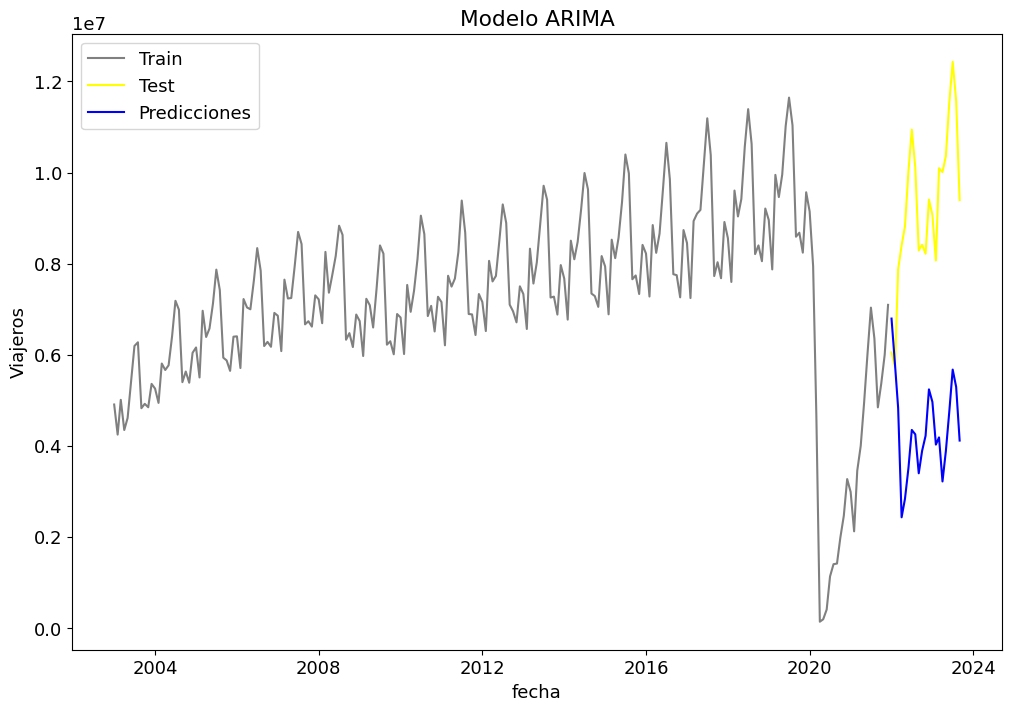

In [111]:
plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Train', color='gray')
plt.plot(S_int_pax_test, label='Test', color='yellow')
plt.plot(predi_test_2, label='Predicciones', color='blue')
plt.xlabel('fecha')
plt.ylabel('Viajeros')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()

### Análisis de ambos modelos
Comparamos los dos modelos arima obtenidos, para ello analizamos en primer los gráficos residuales de ambos:

* **Modelo ARIMA(1, 1, 0)x(0, 1, 1, 12)**: Este modelo muestra una variabilidad considerable en los residuos estandarizados a lo largo del tiempo, con algunos valores extremos evidentes, especialmente hacia el final del período. El gráfico Q-Q se desvía de la línea roja en los extremos, lo que sugiere que los residuos no siguen una distribución normal en las colas. El histograma con la estimación de la densidad del kernel (KDE) muestra una discrepancia con la distribución normal (N(0,1)). El correlograma muestra algunos picos fuera de las bandas de confianza, lo que indica la presencia de autocorrelación en los residuos.

* **Modelo ARIMA(2, 0, 0)x(1, 1, 1, 12)**: Los residuos de este modelo parecen ser menos volátiles en comparación con los de la primera imagen y no presentan valores extremos tan evidentes. El gráfico Q-Q sigue más de cerca la línea roja, lo que indica una mejor adhesión a la distribución normal, aunque aún hay desviaciones en las colas. El histograma muestra que los residuos se ajustan más estrechamente a la distribución normal. El correlograma no muestra picos significativos, lo que sugiere que no hay autocorrelaciones residuales significativas.

Basándonos en estos diagnósticos, el segundo modelo ARIMA(2,0,0)x(1,1,1,12) parece tener un mejor ajuste ya que los residuos están más cerca de lo que se espera de una distribución normal y no hay evidencia de autocorrelaciones residuales significativas. Esto implica que el modelo está capturando la estructura de los datos de manera más efectiva.

Desde el punto de vista de los valores predichos, se nota en ambos modelos una gran influencia de los valores del año 2020 como consecuencia del Covid-19. No obstante, el segundo modelo parece seguir mejor la tendencia creciente de los datos originales. No obstante viendo la siguiente tabla:

| Fecha      | ARIMA(1, 1, 0)x(0, 1, 1, 12) | ARIMA(2, 0, 0)x(1, 1, 1, 12) | Datos Reales |
|------------|---------------------------------|--------------------------|--------------|
| 2022-01-01 | 6,792,450                       | 6,792,972                | 6,048,973    |
| 2022-02-01 | 5,784,340                       | 5,783,289                | 5,725,939    |
| 2022-03-01 | 6,306,812                       | 4,830,264                | 7,872,874    |
| 2022-04-01 | 5,298,159                       | 2,429,469                | 8,398,121    |
| 2022-05-01 | 5,794,374                       | 2,834,601                | 8,815,732    |
| 2022-06-01 | 6,655,940                       | 3,509,320                | 10,023,468   |
| 2022-07-01 | 7,512,606                       | 4,347,637                | 10,943,155   |
| 2022-08-01 | 7,059,724                       | 4,250,949                | 10,115,929   |
| 2022-09-01 | 5,516,104                       | 3,395,789                | 8,287,331    |
| 2022-10-01 | 5,873,362                       | 3,888,574                | 8,414,518    |
| 2022-11-01 | 6,030,882                       | 4,219,361                | 8,216,914    |
| 2022-12-01 | 7,118,794                       | 5,239,126                | 9,405,384    |
| 2023-01-01 | 6,814,938                       | 4,962,452                | 9,066,833    |
| 2023-02-01 | 5,805,993                       | 4,025,387                | 8,066,893    |
| 2023-03-01 | 6,328,180                       | 4,184,476                | 10,094,584   |
| 2023-04-01 | 5,319,430                       | 3,216,264                | 10,008,645   |
| 2023-05-01 | 5,815,612                       | 3,881,477                | 10,358,666   |
| 2023-06-01 | 6,677,167                       | 4,758,606                | 11,544,505   |
| 2023-07-01 | 7,533,829                       | 5,672,622                | 12,432,615   |
| 2023-08-01 | 7,080,947                       | 5,291,894                | 11,572,149   |
| 2023-09-01 | 5,537,325                       | 4,114,360                | 9,392,985    |



Podemos ver cómo los datos se alejan de los valores reales en ambos casos, por lo que se entiende que la tendencia del Covid del año 2020 influyó considerablemente en el modelo.

El modelo que finalmente elegimos es el segund, el **ARIMA(2, 0, 0)x(1, 1, 1, 12)**.

## Expresión algebraica del modelo ARIMA(2, 0, 0)x(1, 1, 1, 12)



La expresión algebraica queda de la siguiente forma:

$$
(1 - \phi_1 B - \phi_2 B^2)(1 - \Phi B^{12})\nabla^{12}X_t = (1 - \theta B^{12})\varepsilon_t
$$

donde:
- $B$ es el operador de retroceso.
- $\nabla^{12}X_t$ representa la diferencia estacional de $X_t$.
- $\phi_1 = 1.174$ y $\phi_2 = -0.2467$ son los coeficientes de la parte AR no estacional.
- $\Phi = -0.4872$ es el coeficiente de la parte AR estacional en el retraso 12.
- $\theta = -0.3116$ es el coeficiente de la parte MA estacional en el retraso 12.
- $\varepsilon_t$ es el término de error en el tiempo $t$ con varianza $\sigma^2 = 3.938 \times 10^{11}$.


## Predicciones en datos no observados

Vamos a tratar de ver la predicción para los datos faltantes de 2023 y todo el año 2024 calculando los intervalos de confianza. Representaremos estos valores gráficamente a continuación de los datos de entrenamiento.

In [103]:
# Calcular las predicciones para el año siguiente al último observado
prediciones_2 = resultados_a.get_forecast(steps=36)
predi_test=prediciones_2.predicted_mean
print(predi_test)

2022-01-01    6.792972e+06
2022-02-01    5.783289e+06
2022-03-01    4.830264e+06
2022-04-01    2.429469e+06
2022-05-01    2.834601e+06
2022-06-01    3.509320e+06
2022-07-01    4.347637e+06
2022-08-01    4.250949e+06
2022-09-01    3.395789e+06
2022-10-01    3.888574e+06
2022-11-01    4.219361e+06
2022-12-01    5.239126e+06
2023-01-01    4.962452e+06
2023-02-01    4.025387e+06
2023-03-01    4.184476e+06
2023-04-01    3.216264e+06
2023-05-01    3.881477e+06
2023-06-01    4.758606e+06
2023-07-01    5.672622e+06
2023-08-01    5.291894e+06
2023-09-01    4.114360e+06
2023-10-01    4.617714e+06
2023-11-01    5.097066e+06
2023-12-01    6.152466e+06
2024-01-01    5.863024e+06
2024-02-01    4.889701e+06
2024-03-01    4.506208e+06
2024-04-01    2.839370e+06
2024-05-01    3.377238e+06
2024-06-01    4.155181e+06
2024-07-01    5.031799e+06
2024-08-01    4.788979e+06
2024-09-01    3.768076e+06
2024-10-01    4.265902e+06
2024-11-01    4.672537e+06
2024-12-01    5.710270e+06
Freq: MS, Name: predicted_me

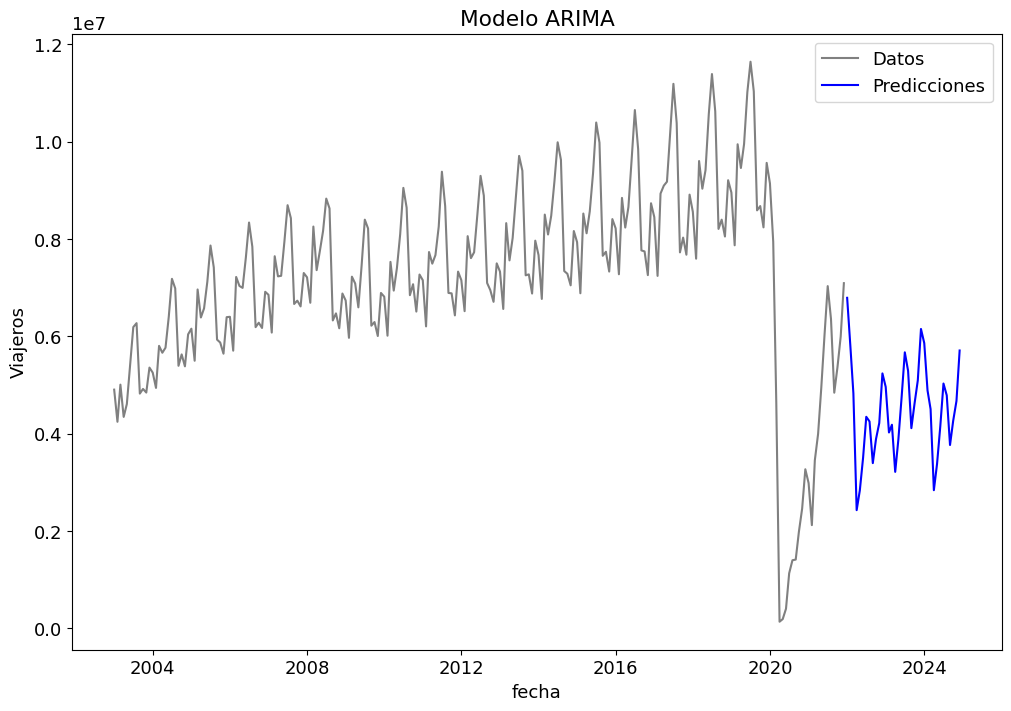

In [104]:
plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_int_pax_train, label='Datos', color='gray')
plt.plot(prediciones_2.predicted_mean, label='Predicciones', color='blue')
plt.xlabel('fecha')
plt.ylabel('Viajeros')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()

Como podemos observar, los valores siguen distantes de la realidad, aunque reflejan bien la estacionalidad de los datos y la ligera tendencia ascendente.

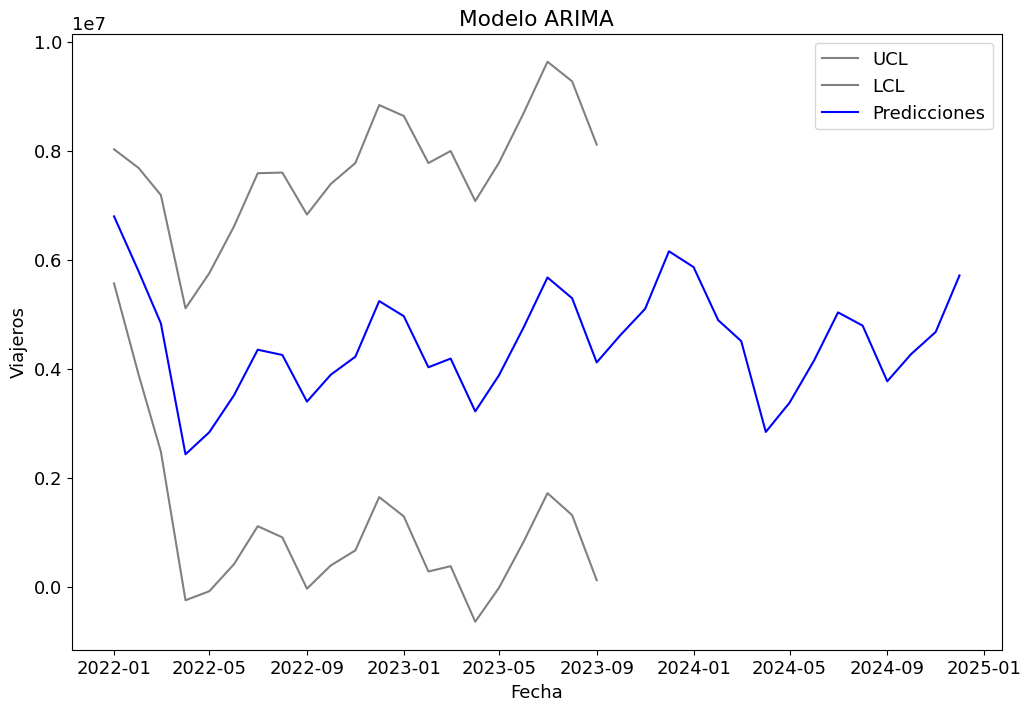

In [105]:
# Obtener intervalos de confianza para las predicciones
intervalos_confianza = prediciones.conf_int()
plt.figure(figsize=(12, 8))
plt.plot(intervalos_confianza['lower Int_Pax'], label='UCL', color='gray')
plt.plot(intervalos_confianza['upper Int_Pax'], label='LCL', color='gray')
plt.plot(predi_test, label='Predicciones', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Viajeros')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()

Como podemos ver, los intervalos de confianza son muy grandes, lo que sugiere gran incertidumbre por parte del modelo en las predicciones.

## Comparación de los modelos obtenidos

Vemos en una tabla comparativa los resultados para todos los modelos probados:


| Fecha      | Suavizado Exponencial Simple | Alisado Doble de Holt | Tendencia Amortiguada | Holt-Winters | Valores Reales | ARIMA(1, 1, 0)x(0, 1, 1, 12) | ARIMA(2, 0, 0)x(1, 1, 1, 12) |
|------------|-----------------------------|-----------------------|-----------------------|--------------|----------------|---------------------------------|--------------------------|
| 2022-01-01 | 7,088,354                   | 7,188,902             | 7,098,409             | 6,893,295    | 6,048,973      | 6,792,450                       | 6,792,972                |
| 2022-02-01 | 7,088,354                   | 7,288,948             | 7,108,314             | 6,218,314    | 5,725,939      | 5,784,340                       | 5,783,289                |
| 2022-03-01 | 7,088,354                   | 7,388,994             | 7,118,120             | 7,650,182    | 7,872,874      | 6,306,812                       | 4,830,264                |
| 2022-04-01 | 7,088,354                   | 7,489,040             | 7,127,828             | 7,287,875    | 8,398,121      | 5,298,159                       | 2,429,469                |
| 2022-05-01 | 7,088,354                   | 7,589,086             | 7,137,439             | 7,650,670    | 8,815,732      | 5,794,374                       | 2,834,601                |
| 2022-06-01 | 7,088,354                   | 7,689,132             | 7,146,953             | 8,336,298    | 10,023,468     | 6,655,940                       | 3,509,320                |
| 2022-07-01 | 7,088,354                   | 7,789,178             | 7,156,373             | 9,059,880    | 10,943,155     | 7,512,606                       | 4,347,637                |
| 2022-08-01 | 7,088,354                   | 7,889,224             | 7,165,698             | 8,657,916    | 10,115,929     | 7,059,724                       | 4,250,949                |
| 2022-09-01 | 7,088,354                   | 7,989,270             | 7,174,930             | 7,009,098    | 8,287,331      | 5,516,104                       | 3,395,789                |
| 2022-10-01 | 7,088,354                   | 8,089,316             | 7,184,070             | 7,279,847    | 8,414,518      | 5,873,362                       | 3,888,574                |
| 2022-11-01 | 7,088,354                   | 8,189,362             | 7,193,118             | 7,138,840    | 8,216,914      | 6,030,882                       | 4,219,361                |
| 2022-12-01 | 7,088,354                   | 8,289,408             | 7,202,076             | 7,994,669    | 9,405,384      | 7,118,794                       | 5,239,126                |
| 2023-01-01 | 7,088,354                   | 8,389,454             | 7,210,944             | 7,803,777    | 9,066,833      | 6,814,938                       | 4,962,452                |
| 2023-02-01 | 7,088,354                   | 8,489,500             | 7,219,724             | 7,128,796    | 8,066,893      | 5,805,993                       | 4,025,387                |
| 2023-03-01 | 7,088,354                   | 8,589,546             | 7,228,415             | 8,560,664    | 10,094,584     | 6,328,180                       | 4,184,476                |
| 2023-04-01 | 7,088,354                   | 8,689,592             | 7,237,020             | 8,198,357    | 10,008,645     | 5,319,430                       | 3,216,264                |
| 2023-05-01 | 7,088,354                   | 8,789,638             | 7,245,539             | 8,561,151    | 10,358,666     | 5,815,612                       | 3,881,477                |
| 2023-06-01 | 7,088,354                   | 8,889,684             | 7,253,973             | 9,246,780    | 11,544,505     | 6,677,167                       | 4,758,606                |
| 2023-07-01 | 7,088,354                   | 8,989,730             | 7,262,322             | 9,970,361    | 12,432,615     | 7,533,829                       | 5,672,622                |
| 2023-08-01 | 7,088,354                   | 9,089,776             | 7,270,588             | 9,568,398    | 11,572,149     | 7,080,947                       | 5,291,894                |
| 2023-09-01 | 7,088,354                   | 9,189,822             | 7,278,771             | 7,919,579    | 9,392,985      | 5,537,325                       | 4,114,360                |


Vamos a representar gráficamente dichos valores:

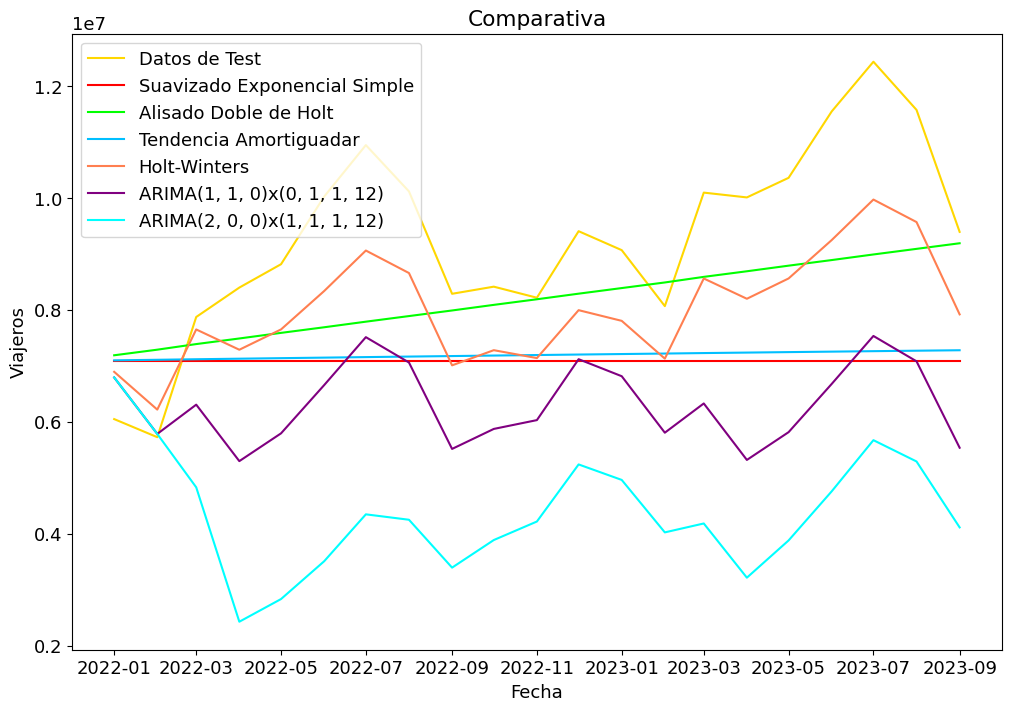

In [112]:
plt.figure(figsize=(12, 8))

# Serie original
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_int_pax_test, label='Datos de Test', color='gold')

# Forecast alisado simple
plt.plot(fcast_series, label='Suavizado Exponencial Simple', color='red')

# Forecast Alisado Doble de Holt
plt.plot(fcast_series1, label='Alisado Doble de Holt', color='lime')

# Forecast Tendencia Amortiguada
plt.plot(fcast_series2, label='Tendencia Amortiguadar', color='deepskyblue')

# Forecast Holt-Winters
plt.plot(fcast_series3, label='Holt-Winters', color='coral')

# Forecast Arima_1
plt.plot(prediciones_1.predicted_mean, label='ARIMA(1, 1, 0)x(0, 1, 1, 12)', color='purple')

# Forecast Arima_2
plt.plot(predi_test_2, label='ARIMA(2, 0, 0)x(1, 1, 1, 12)', color='cyan')

plt.xlabel('Fecha')
plt.ylabel('Viajeros')
plt.title('Comparativa')
plt.legend()
plt.show()


### Conclusiones

Sobre todos los modelos probados podemos extraer las siguientes conclusiones:

* **Sobreajuste y Precisión**: La mayoría de los modelos no se ajustan a los datos pese a que siguen la tendencia general de los valores reales pero no capturan adecuadamente las fluctuaciones. Por otro lado la precisión de los modelos, a excepción del de Holt-Winters es pobre influenciados por los datos relativos al COVID-19.

* **Tendencia**: Los modelos de Suavizado Exponencial Simple, Alisado Doble de Holt y Tendencia Amortiguada, muestran una tendencia creciente constante que no refleja las caídas y subidas presentes en los valores reales. Esto podría significar que estos modelos no están capturando adecuadamente la estacionalidad o los ciclos subyacentes en los datos. Los demás modelos si que captan con mayor fidelidad estas subidas y bajadas.

* **Mejor ajuste general**: El modelo Holt-Winters parece ser el que mejor se ajusta a los valores reales, captando correctamente las tendencias estacionales de subidas y bajadas, aunque por debajo de los valores reales.

Por todo lo mencionado anteriormente, consideramos que el modelo de Holt-Winters es el que mejor aproxima esta serie temporal.